## Importing the Libraries

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
# libraries that are generally imported for any deep learning model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.metrics import confusion_matrix

# libraries need to prepare the data
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

# libraries required to build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model

# libraries for activation functions required
from tensorflow.keras.activations import relu
from tensorflow.keras.activations import softmax

# weight initializer libraries
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.initializers import HeUniform

# optimizer library
from tensorflow.keras.optimizers import Adam

# callback library
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# setting the random seed to generalize the output
# the seed value is used to generate the random number generator. 
# And, every time you use the same seed value, you will get the same random values.

# setting random seed in numpy
from numpy.random import seed
seed(1)

# setting random seed in tensorflow
tf.random.set_seed(2) 

## Preparing the Dataset

### Preparing Training Images

In [3]:
# creating an object of the ImageDataGenerator class
# the ImageDatagenerator class helps in image augmentation by allowing us to apply different transforms to our images
# for example: rescale - normaizes the value of each colour channel(R or G or B) of each pixel between 0 and 1
#              shear range - shears images by a certain amount ( value accepted is between 0 and 1)
#              rotation range - rotates images by a certain amount
#              zoom range - allows us to zoom images
#              horizontal and vertical flip - flips images by in directions named to produce input randomness
train_data_gen = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                    rotation_range=2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    vertical_flip=True)

In [4]:
# we now use the flow_from_directory function from the ImageDataGenerator class
# this function allows us to import our dataset consisting of images from a directory/folder
# target_size - resizes the images according to the input shape of the model
# class mode - using categorical class mode since we have a multiclass classification
# batch_size - gives batches of images as input to the model instead of single images
training_set = train_data_gen.flow_from_directory(directory="../../Datasets/BrainTumorSplitData_images/Training",
                                                  target_size=(224,224),
                                                  class_mode='categorical',
                                                  batch_size=32)

Found 8205 images belonging to 4 classes.


### Preparing Validation Images

In [5]:
# creating another object of ImageDataGenerator class
# here we do not apply any transformations because we want our validation data to be absolutely new to our model ( i.e. unprepared) 
# we only rescale the pixel values to normalize them between 0 and 1
validation_data_gen = ImageDataGenerator(rescale=1./255)

In [6]:
# importing our validation set images with the same image size and batch size
validation_set = validation_data_gen.flow_from_directory(directory="../../Datasets/BrainTumorSplitData_images/Testing",
                                                        target_size=(224,224),
                                                        class_mode='categorical',
                                                        batch_size=32)

Found 1705 images belonging to 4 classes.


### How the dataset looks ?

In [7]:
# next function iterates over the training set and separates the images and their labels 
imgs, labels = next(training_set)

In [8]:
#we define a function that prints the first 10 images from the training set 
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

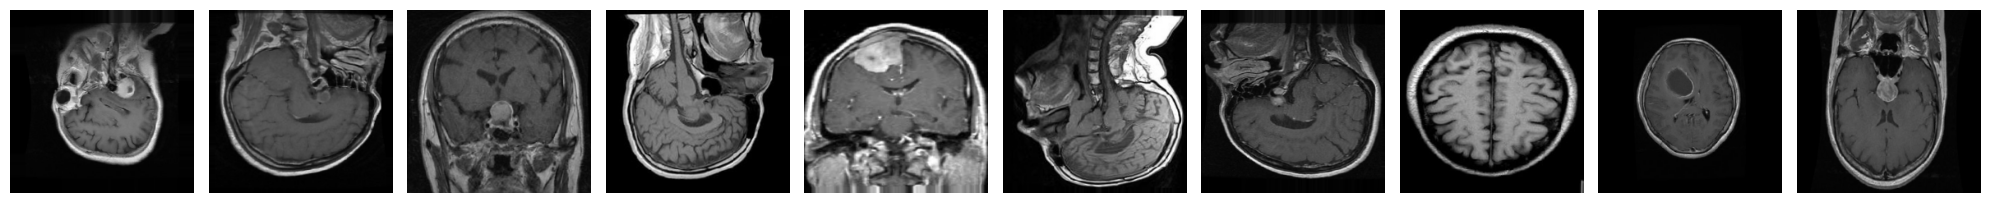

[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


In [9]:
# calling our function to print the first 10 images
plotImages(imgs)
# printing all the labels from the first batch of 32 images
print(labels)

## Load ResNet50

In [60]:
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = Sequential()

model.add(resnet_model)

model.add(Flatten())

model.add(Dense(units=64, activation='relu', use_bias=True))
model.add(Dropout(0.4))
model.add(Dense(units=32, activation='relu', use_bias=True))

model.add(Dense(units=4, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_3 (Dense)             (None, 64)                6422592   
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 4)                 132       
                                                                 
Total params: 30,012,516
Trainable params: 29,959,396


In [10]:
# 11.5m
model = Sequential()

model.add(Conv2D(filters=32,
                 kernel_size=3,
                 activation=relu,
                 input_shape=[224, 224, 3]))

model.add(Conv2D(filters=32,
                 kernel_size=3,
                 activation=relu))

model.add(MaxPooling2D(pool_size=2,
                       strides=2,
                       padding='valid'))

model.add(Conv2D(filters=32,
                 kernel_size=3,
                 activation=relu))

model.add(Conv2D(filters=64,
                 kernel_size=3,
                 activation=relu))

model.add(MaxPooling2D(pool_size=2,
                       strides=2,
                       padding='valid'))

model.add(Flatten())

model.add(Dense(units=64,
                activation=relu,
                use_bias=True))

model.add(Dropout(0.4))

model.add(Dense(units=32,
                activation=relu,
                use_bias=True))

model.add(Dense(units=4,
                activation=softmax))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 32)      9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 64)       0         
 2D)                                                    

## Building a Convolutional Neural Network

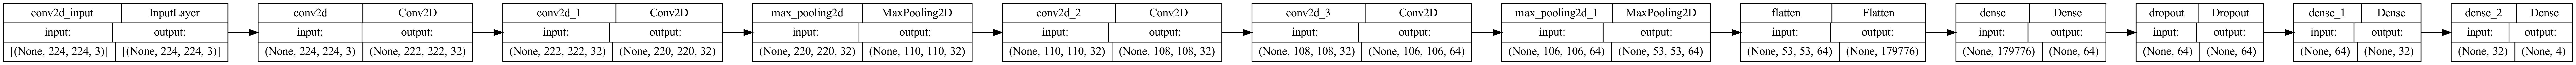

In [16]:
plot_model(model, to_file='model_plot_horizontal.png', show_shapes=True, show_layer_names=True, rankdir='LR',
           dpi=300)

In [11]:
# the Sequential() helps make a sequential model. 
# A sequential model is a model which consists of a sequence of layers.
# model = Sequential()

### Adding First Cluster of 2 Convolution and 1 Max Pooling Layer

In [58]:
# adding a Conv2D layer
# Conv2D is a function for the convolutional layer 
# In a convolutional layer, multiple filters are applied on each image to highlight key features from the particular image
# after the applying the filters the image is called a feature map
# here we apply 32 filters to each image and our filters are 3x3 matrices which is the kernel_size
# we give our activation function as ReLU. This is one the best activation functions because it helps prevent Vanishing Gradient Problem during the backpropagation stage
# model.add(Conv2D(filters=32,
#                  kernel_size=3,
#                  activation=relu,
#                  input_shape=[224, 224, 3]))

In [59]:
# Adding a second convolutional layer
# model.add(Conv2D(filters=32,
#                  kernel_size=3,
#                  activation=relu))

In [60]:
# Adding the first MaxPool2D layer
# MaxPool2D is a function for the max pooling layer
# In the max pooling layer we apply a kernel to the feature maps which preserves only the highlighted portions on the images
# there are other types of pooling like minPooling, avgPooling, etc.
# here we use pool_size 2 which decides the size of the matrix(area) from which we select the highest value(max pooling)
# strides - this is the number of places the kernel will move after taking max from one area ( the kernel moves from left to right)
# padding - while moving if our kernel faces empty places within it when at one edge of the feature map, then it uses padding by applying zero values to those places
# model.add(MaxPool2D(pool_size=2,
#                     strides=2,
#                     padding='valid'))

### Adding 2nd Cluster of 2 Convolution & 1 Max Pooling Layer

In [61]:
# adding another Conv2D layer
# model.add(Conv2D(filters=32,
#                  kernel_size=3,
#                  activation=relu))

In [62]:
# adding a fourth Conv2D layer
# model.add(Conv2D(filters=64,
#                  kernel_size=3,
#                  activation=relu))

In [63]:
# adding a second MaxPool2D layer 
# model.add(MaxPool2D(pool_size=2,
#                     strides=2,
#                     padding='valid'))

### Flattening the Output of Convolutional Layers

In [64]:
# adding a Flatten layer
# the Flatten() layer is used to flatten the output from the last layer to prepare it for input to the upcoming fully connected layers
# model.add(Flatten())

### Adding 2 Fully Connected Layers with Dropout Layer in Between

In [65]:
# adding the first Dense layer
# this is our first fully connected layer which allows the model to train itself by adjusting the weights and biases
# neurons - this is the number of neurons that are present in this layer. Here we use 32 neurons (experimental value)
# activation - we use ReLU 
# use_bias - we set this to true as we want to use a bias value 
# kernel_initializer - this is used to initialize the weights at the beginning of the training
#                      There are many types of weight initializers like Xavier/Gorat (Uniform & Normal) or He (Uniform & Normal), etc. 
# model.add(Dense(units=32,
#                 activation=relu,
#                 use_bias=True
# #                 kernel_initializer=HeNormal()
#                ))

In [66]:
# Here we are using a Dropout layer
# A dropout layer disables some randomly chosen neurons by making their input weights zero during training.
# During testing, these connections are reconnected.
# we use a dropout layer to prevent overfitting because sometimes the model gets too dependent on some particular neurons
# and thus gets overfitted.
# model.add(Dropout(0.4))

In [67]:
# adding another fully connected layer
# model.add(Dense(units=16,
#                 activation=relu,
#                 use_bias=True
# #                 kernel_initializer=HeUniform()
#                ))

### Adding Output Layer

In [68]:
# This is our output layer. 
# We use 4 neurons in our layer since ours is a multiclass classification and we have 4 categories to classify between.  
# model.add(Dense(units=4,
#                 activation=softmax))

### Printing Details of Model

In [69]:
# printing the details of our model
# model.summary()

### Compiling the Model

In [17]:
# This is the compilation stage. 
# We use the compile()
# optimizer - here we give an optimizer function which is currently one of the best optimizers as it uses both a momentum (weighted average) for noise reduction and 
#             also uses an adaptive learning rate
# loss - we use the categorical_crossentropy to calculate our loss as we have multiclass classification
# metrics - we use accuracy as a measure of performance of our model
model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

### Early Stopping Function

In [18]:
# Early stopping - this is a callback function which stops the training of the model based on the monitored parameter
# monitor - parameter to be monitored
# min_delta - Minimum change in the monitored quantity to qualify as an improvement
# patience - Number of epochs with no improvement after which training will be stopped.
# verbose - messages to be displayed
# mode - One of {"auto", "min", "max"}. In min mode, training will stop when the quantity monitored has stopped decreasing; 
#        in "max" mode it will stop when the quantity monitored has stopped increasing; 
#        in "auto" mode, the direction is automatically inferred from the name of the monitored quantity.
# baseline - Baseline value for the monitored quantity. Training will stop if the model doesn't show improvement over the baseline.
# restore_best_weights - Whether to restore model weights from the epoch with the best value of the monitored quantity. 
#                        If False, the model weights obtained at the last step of training are used.

early_stopper = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

## Training out Model

In [72]:
# we train the model using the fit()
# x - the training data
# vaidation_data - data against which the model accuracy will be calculated after training
# epochs - number of times the model will train on the whole dataset to improve its performance. Here the value 60 is completely experimental.
# verbose - determines verbosity. types of messages to display.

##### 5M params
model_history = model.fit(x=training_set,validation_data=validation_set,epochs=15,verbose=1)

Epoch 1/15


2024-02-25 21:37:17.592306: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


167/167 [==============================] - ETA: 0s - loss: 1.0177 - accuracy: 0.5591

2024-02-25 21:38:23.228760: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


167/167 [==============================] - 69s 410ms/step - loss: 1.0177 - accuracy: 0.5591 - val_loss: 0.8330 - val_accuracy: 0.6682
Epoch 2/15
167/167 [==============================] - 69s 412ms/step - loss: 0.7392 - accuracy: 0.7074 - val_loss: 0.8311 - val_accuracy: 0.7010
Epoch 3/15
167/167 [==============================] - 69s 414ms/step - loss: 0.6841 - accuracy: 0.7250 - val_loss: 0.8252 - val_accuracy: 0.6743
Epoch 4/15
167/167 [==============================] - 69s 410ms/step - loss: 0.6399 - accuracy: 0.7468 - val_loss: 0.6894 - val_accuracy: 0.7239
Epoch 5/15
167/167 [==============================] - 72s 432ms/step - loss: 0.5860 - accuracy: 0.7749 - val_loss: 0.7160 - val_accuracy: 0.6949
Epoch 6/15
167/167 [==============================] - 71s 427ms/step - loss: 0.5701 - accuracy: 0.7831 - val_loss: 0.6095 - val_accuracy: 0.7338
Epoch 7/15
167/167 [==============================] - 72s 432ms/step - loss: 0.5416 - accuracy: 0.7869 - val_loss: 0.5949 - val_accuracy: 0.7

In [19]:
##### 11.5M params
model_history = model.fit(x=training_set,validation_data=validation_set,epochs=30,verbose=1)

Epoch 1/30


2024-04-15 16:20:21.305121: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp_10.


257/257 [==============================] - 124s 447ms/step - loss: 1.2915 - accuracy: 0.4910 - val_loss: 2.6986 - val_accuracy: 0.5384
Epoch 2/30
257/257 [==============================] - 112s 436ms/step - loss: 8.6725 - accuracy: 0.3115 - val_loss: 1.3474 - val_accuracy: 0.3906
Epoch 3/30
257/257 [==============================] - 114s 444ms/step - loss: 2.1146 - accuracy: 0.3580 - val_loss: 3.3244 - val_accuracy: 0.4921
Epoch 4/30
257/257 [==============================] - 117s 453ms/step - loss: 3.2369 - accuracy: 0.3978 - val_loss: 4.9896 - val_accuracy: 0.4516
Epoch 5/30
257/257 [==============================] - 115s 448ms/step - loss: 1.6858 - accuracy: 0.5420 - val_loss: 2.4293 - val_accuracy: 0.4158
Epoch 6/30
257/257 [==============================] - 115s 448ms/step - loss: 4.4882 - accuracy: 0.5265 - val_loss: 10.0697 - val_accuracy: 0.5648
Epoch 7/30
257/257 [==============================] - 115s 448ms/step - loss: 62.3893 - accuracy: 0.4849 - val_loss: 144.5706 - val_ac

KeyboardInterrupt: 

In [63]:
# ResNet50
model_history = model.fit(x=training_set,validation_data=validation_set,epochs=15,verbose=1)

Epoch 1/15


2024-02-27 00:21:08.862678: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


167/167 [==============================] - ETA: 0s - loss: 1.5711 - accuracy: 0.5940

2024-02-27 00:23:35.731156: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


167/167 [==============================] - 166s 883ms/step - loss: 1.5711 - accuracy: 0.5940 - val_loss: 1.4204 - val_accuracy: 0.2288
Epoch 2/15
167/167 [==============================] - 160s 958ms/step - loss: 1.0286 - accuracy: 0.7280 - val_loss: 2.3002 - val_accuracy: 0.2311
Epoch 3/15
167/167 [==============================] - 179s 1s/step - loss: 0.6116 - accuracy: 0.8034 - val_loss: 5.0775 - val_accuracy: 0.3082
Epoch 4/15
167/167 [==============================] - 185s 1s/step - loss: 0.4805 - accuracy: 0.8461 - val_loss: 4.0141 - val_accuracy: 0.2334
Epoch 5/15
167/167 [==============================] - 188s 1s/step - loss: 0.5006 - accuracy: 0.8424 - val_loss: 0.9226 - val_accuracy: 0.6255
Epoch 6/15
167/167 [==============================] - 182s 1s/step - loss: 0.4743 - accuracy: 0.8390 - val_loss: 0.6677 - val_accuracy: 0.7307
Epoch 7/15
167/167 [==============================] - 180s 1s/step - loss: 0.6068 - accuracy: 0.8201 - val_loss: 0.7113 - val_accuracy: 0.7948
Epoc

## ResNet50 accuracy / loss

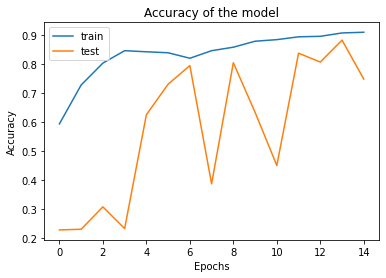

In [65]:
# plot ResNet50 accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Accuracy of the model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

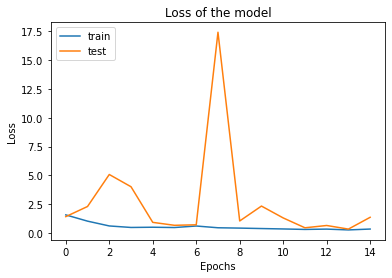

In [66]:
# comparing training and testing loss ResNet50
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Loss of the model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train','test'],loc='upper left')
plt.show()

## Printing Evaluation Keys

In [64]:
# this a callback from the model. the history gets returnes by the fit() used to train the model 
# the history of the model contains all details of its implementation such as the weights, keys, etc.
# here we see the keys which evaluate the model
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [17]:
# model.save('model_snapshot')

INFO:tensorflow:Assets written to: model_snapshot/assets


INFO:tensorflow:Assets written to: model_snapshot/assets


## Plotting Accuracy of the Model

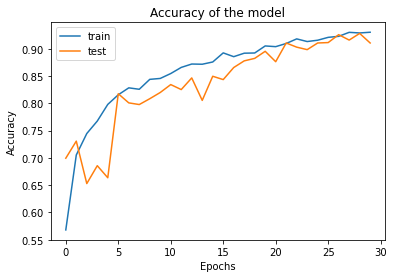

In [18]:
# comparing the training and testing accuracy - 11.5M
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Accuracy of the model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

## Plotting Loss of the Model

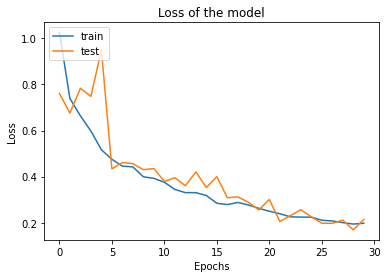

In [19]:
# comparing training and testing loss - 11.5M
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Loss of the model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [89]:
_model = load_model('../TumorSense_app/model.h5') 

In [90]:
predictions = _model.predict(validation_set)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = validation_set.classes

2024-03-16 23:48:47.502749: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-03-16 23:48:47.561740: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


54/54 [==============================] - 5s 81ms/step


In [91]:
cm = tf.math.confusion_matrix(true_classes, predicted_classes)
cm_np = cm.numpy()

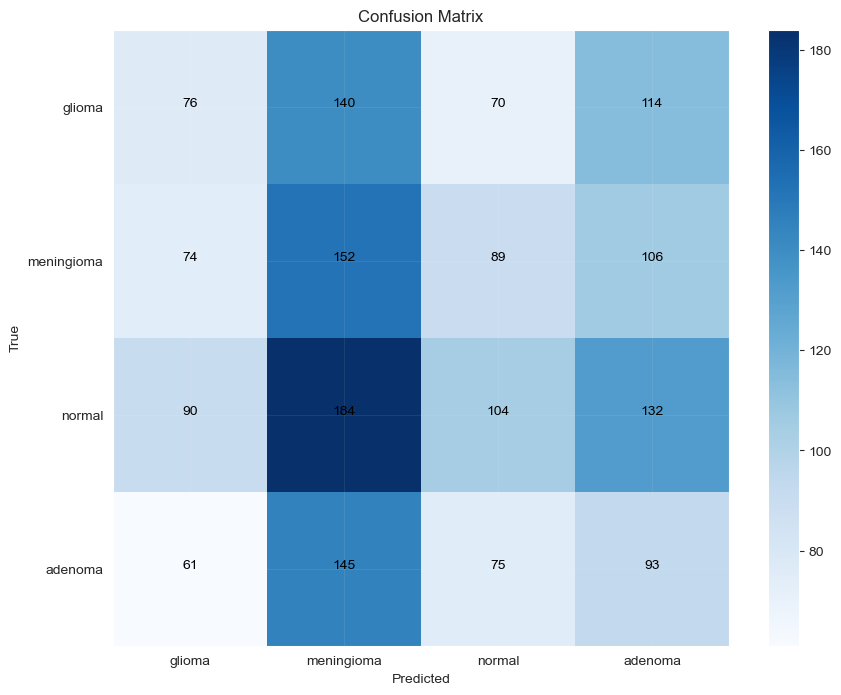

In [95]:
_index = ['glioma', 'meningioma', 'normal', 'adenoma']

plt.figure(figsize=(10, 8))
plt.imshow(cm_np, interpolation='nearest', cmap='Blues')
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
for i in range(len(_index)):
    for j in range(len(index)):
        plt.text(j, i, str(cm_np[i, j]), horizontalalignment='center', color='black')
plt.xticks(ticks=range(len(_index)), labels=_index)
plt.yticks(ticks=range(len(_index)), labels=_index)
plt.grid(alpha=0.08)
plt.show()

## Indexing our Output Values

In [20]:
index = ['glioma','meningioma','normal','adenoma']

## Prediction 1 (Meningioma)

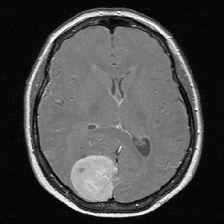

In [28]:
test_image1 = load_img('../testing_dataset_limited/meningioma/Te-me_0010.jpg',target_size = (224,224))
test_image1

In [29]:
test_image1 = img_to_array(test_image1)
test_image1 = np.expand_dims(test_image1,axis=0)
result1 = np.argmax(model.predict(test_image1/255.0),axis=1)
print(index[result1[0]])

1/1 [==============================] - 0s 23ms/step
meningioma


## Prediction 2 (No Tumor)

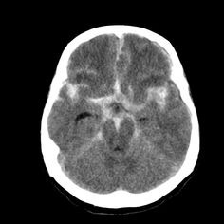

In [30]:
test_image2 = load_img('../testing_dataset_limited/normal/Te-no_0011.jpg',target_size = (224,224))
test_image2

In [31]:
test_image2 = img_to_array(test_image2)
test_image2 = np.expand_dims(test_image2,axis=0)
result2 = np.argmax(model.predict(test_image2/255.0),axis=1)
print(index[result2[0]])

1/1 [==============================] - 0s 23ms/step
normal


In [50]:
acc = "{:.2f}".format(np.max(model_history.history['accuracy']) * 100)
print('Accuracy = '+acc + '%')

Accuracy = 93.05%


## As you see we have achieved an accuracy of approximately 93%
### We have correct predictions on randomly chosen MRI images from the Internet

In [45]:
# save model for flask use 
#model.save('model.h5')